<a href="https://colab.research.google.com/github/santhimaddipudi/ML_Handson/blob/main/Statistics_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statistics
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

sns.set_theme(style="darkgrid")

In [ ]:
forbes_data=pd.read_csv("/content/sample_data/forbes.csv")
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [ ]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

##drop null values

In [ ]:
forbes_data.dropna(inplace=True)
forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [ ]:
forbes_data.shape

(1508, 9)

##calculate measures of central tendency

In [ ]:
market_value_mean=forbes_data['Market Value'].mean()
market_value_mean

26.978494031830238

In [ ]:
market_value_median=forbes_data['Market Value'].median()
market_value_median

13.1

In [ ]:
diff_mean_med=market_value_mean-market_value_median
diff_mean_med

13.878494031830238

In [ ]:
forbes_data['Sector'].value_counts()

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [ ]:
sector_mode=forbes_data['Sector'].mode()
sector_mode

0    Financials
Name: Sector, dtype: object

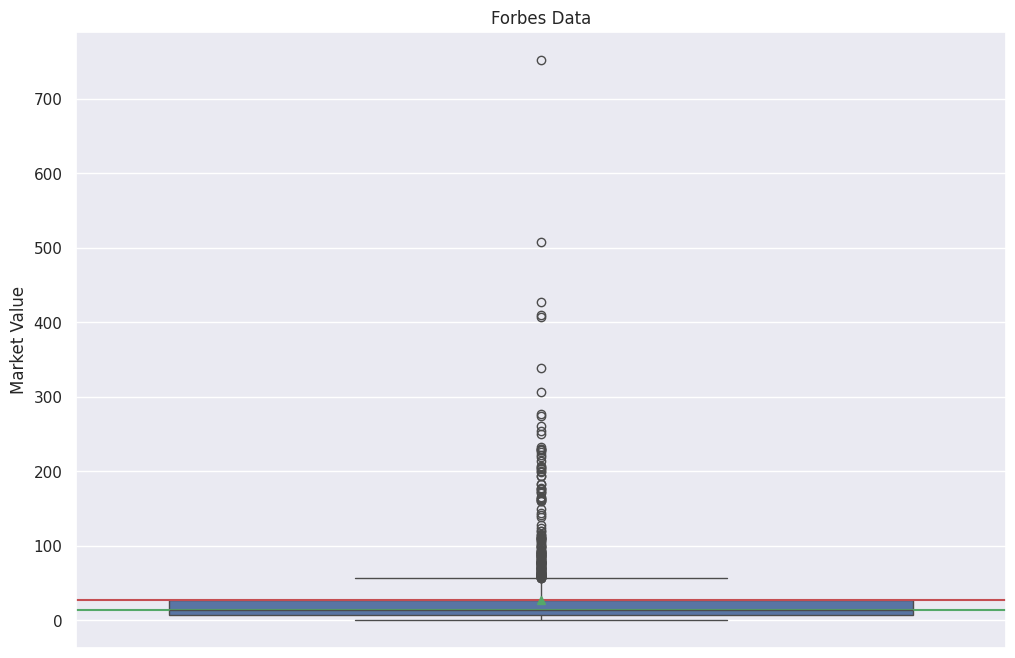

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

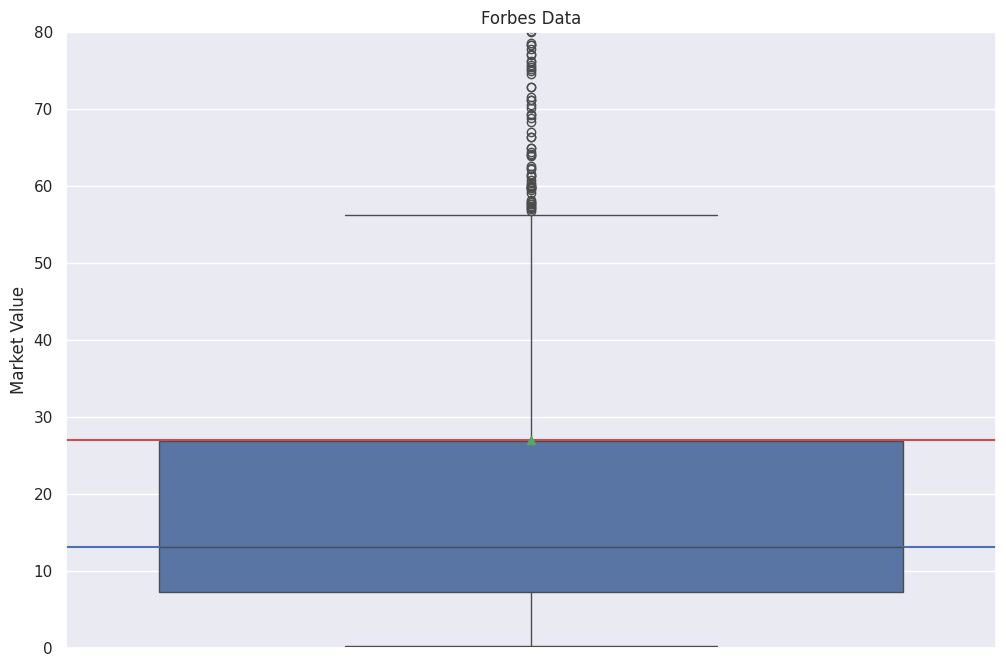

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='b', linestyle='-')

plt.title('Forbes Data')
plt.show()

##calculate measures of dispersion

In [ ]:
prof_max=forbes_data['Profits'].max()
prof_max

45.2

In [ ]:
prof_min=forbes_data['Profits'].min()
prof_min

-13.0

In [ ]:
prof_range=prof_max-prof_min
prof_range

58.2

####see the outliers in profit range

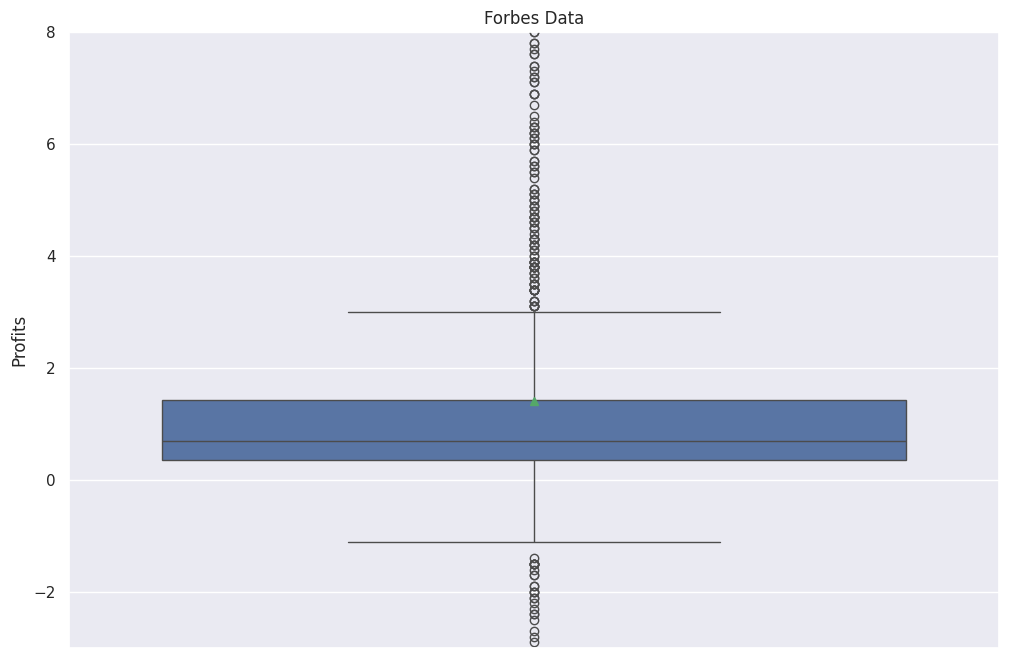

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')
plt.ylim(-3,8)
plt.show()

##IQR

In [ ]:
Q1=np.quantile(forbes_data['Profits'],0.25)
Q1

0.34975

In [ ]:
Q3=np.quantile(forbes_data['Profits'],0.75)
Q3

1.4249999999999998

In [ ]:
IQR=Q3-Q1
IQR

1.0752499999999998

In [ ]:
prof_std=forbes_data['Profits'].std()
prof_std

3.244201278603241

In [ ]:
prof_var=prof_std**2
prof_var

10.524841936090903

In [ ]:
#same as above
prof_var=forbes_data['Profits'].var()
prof_var

10.524841936090903

In [ ]:
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


##Probability and distribution

In [ ]:
def flip(n):

    result=[]
    for i in range(1,n+1):
      result.append(random.choice(["Heads","Tails"]))

    return result


In [ ]:
result=flip(10)
result

['Heads',
 'Heads',
 'Tails',
 'Tails',
 'Tails',
 'Heads',
 'Heads',
 'Tails',
 'Tails',
 'Tails']

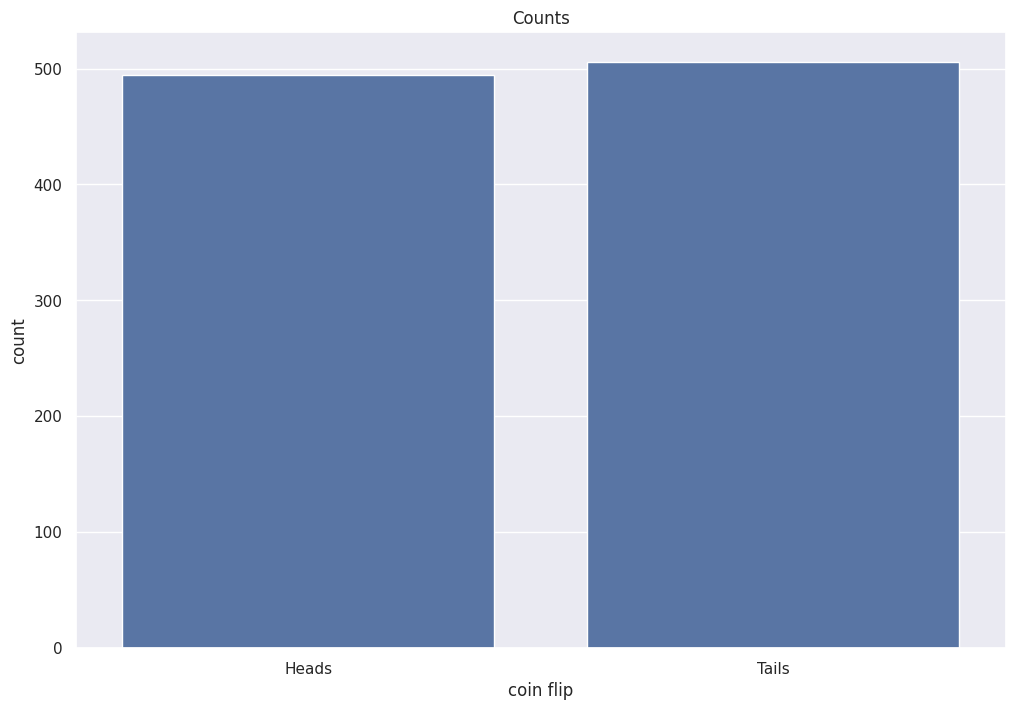

In [ ]:
result=flip(1000)
plt.figure(figsize=(12, 8))

sns.countplot(x=result)

plt.title('Counts')
plt.xlabel('coin flip')
plt.show()

##Normal distribution

In [ ]:
normal_dist_data=np.random.normal(loc=0,scale=1,size=100000)#this method will generate normally distributed data  mean:0 and std=1
normal_dist_data[:10]

array([-0.59627664, -0.96254741, -1.25151609,  0.80658887,  0.52093539,
       -0.20291087,  0.84240754,  0.39641075,  0.43988229, -2.11927073])

In [ ]:
sample_mean=np.mean(normal_dist_data)
sample_mean

-0.000828301439355284

In [ ]:
sample_med=np.median(normal_dist_data)
sample_med

-0.0016531505725145435

In [ ]:
sample_stdev=np.std(normal_dist_data) ##close to 1
sample_stdev

1.0000745446974542

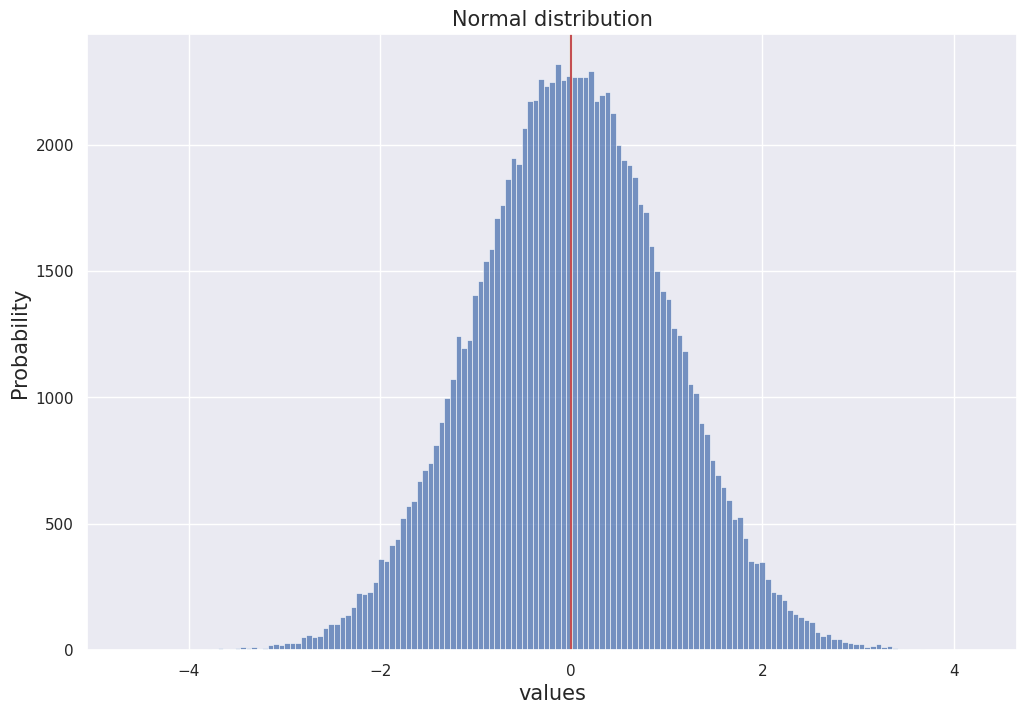

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(x=normal_dist_data)

plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

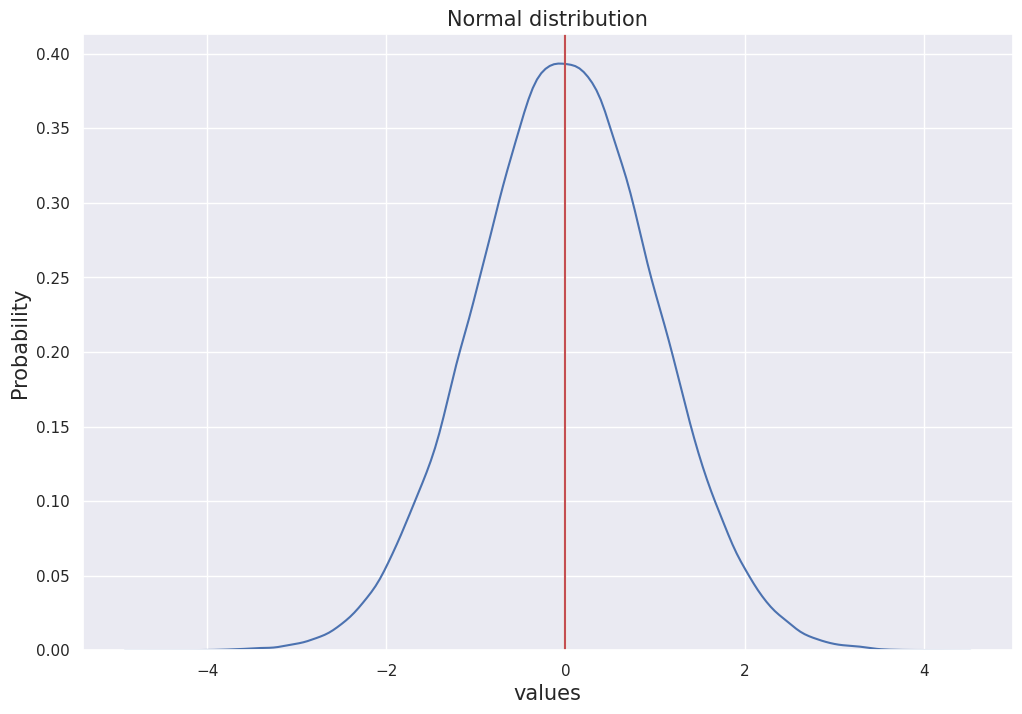

In [ ]:
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)

plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

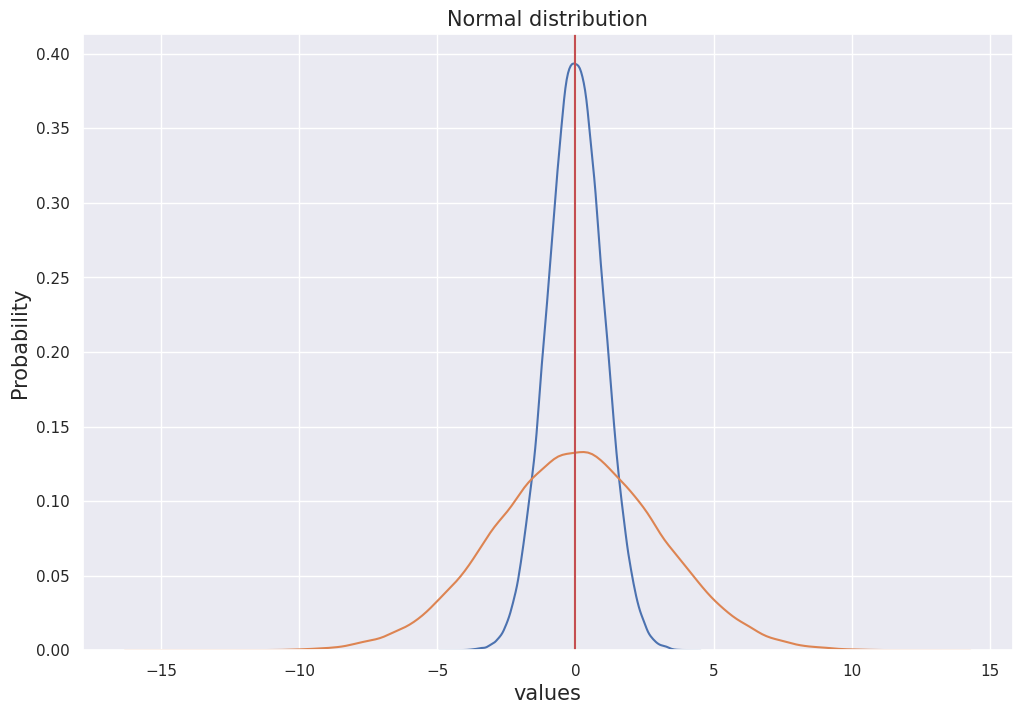

In [ ]:
normal_dist_data_scale3=np.random.normal(loc=0,scale=3,size=100000)#this method will generate normally distributed data  mean:0 and std=3
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)
sns.kdeplot(x=normal_dist_data_scale3)
plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

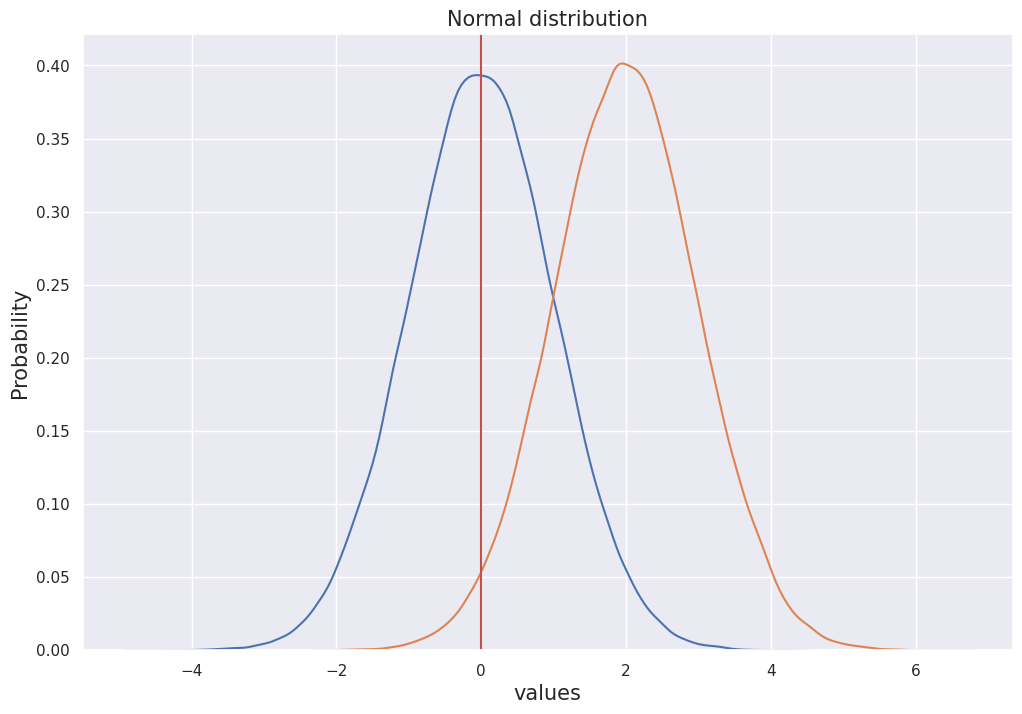

In [ ]:
normal_dist_data_loc2=np.random.normal(loc=2,scale=1,size=100000)#this method will generate normally distributed data  mean:2 and std=1
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)
sns.kdeplot(x=normal_dist_data_loc2)
plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

##skewness and kurtosis


In [ ]:
sp_data=pd.read_csv("/content/sample_data/SP_500_1987.csv")
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


In [ ]:
sp_data['Date']=pd.to_datetime(sp_data['Date'],format='mixed')
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

Text(0.5, 1.0, 'SP DATA')

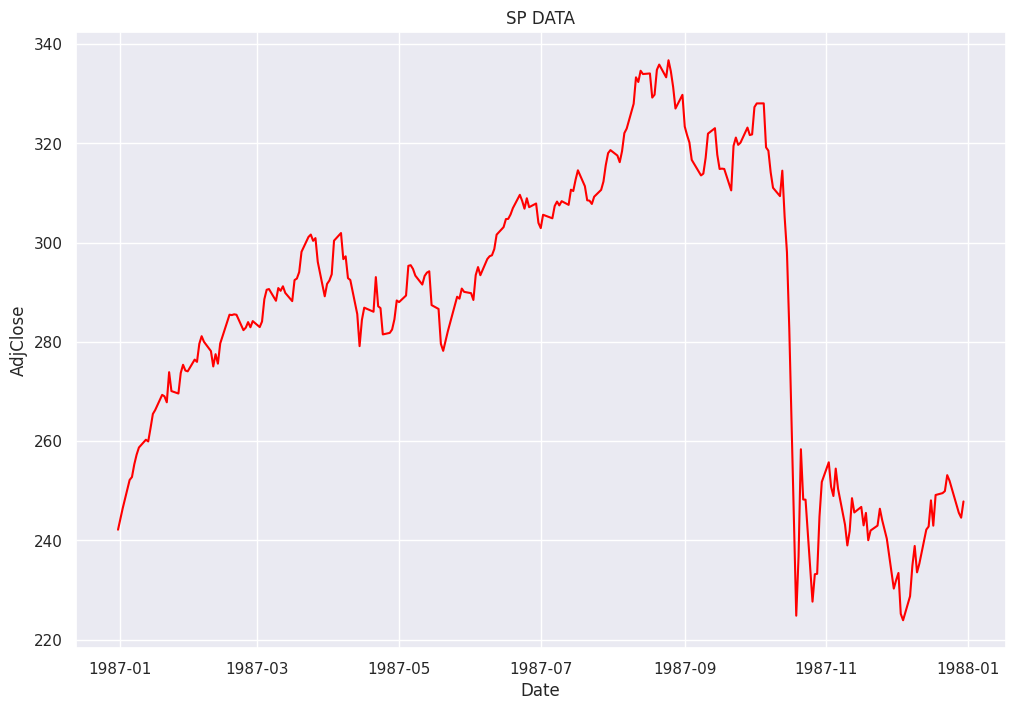

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sp_data,x='Date',y='AdjClose',color='red')
plt.title('SP DATA')

In [ ]:
sp_data['Returns']=sp_data['AdjClose'].pct_change()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
0,1986-12-31,243.37,244.03,241.28,242.17,242.17,"13,92,00,000",NaN
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088


In [ ]:
sp_data=sp_data.dropna()
sp_data
sp_data.shape

(252, 8)

Text(0.5, 1.0, 'SP DATA')

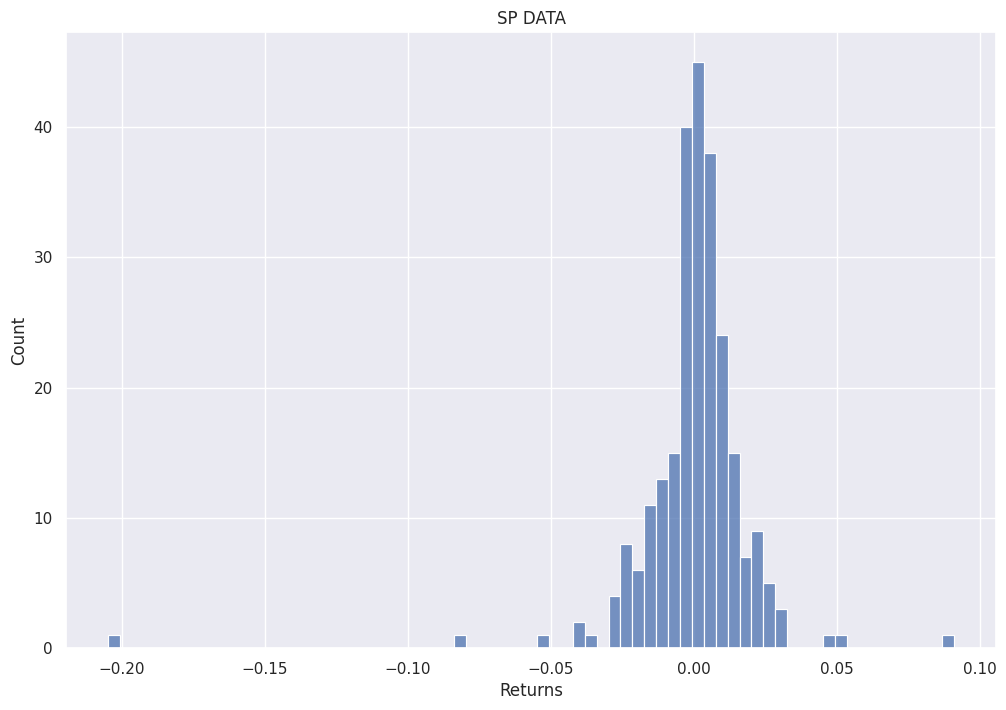

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=sp_data,x='Returns')
plt.title('SP DATA')

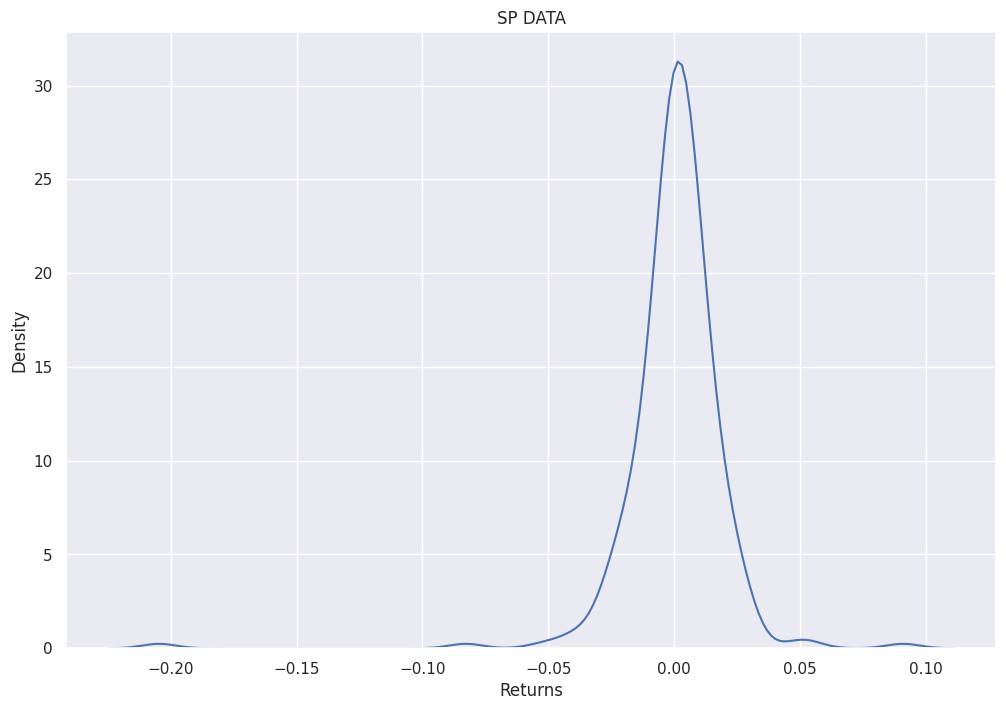

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=sp_data,x='Returns')
plt.title('SP DATA')
plt.show()#it shows the left skew in data

In [ ]:
sp_data['Returns'].skew(axis=0)#skew ness


-4.063006900553241

In [ ]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.038782236530137,
 0.033689707286255054,
 -0.11690104948849872,
 -0.06460582304845877)

In [ ]:
sp_data['Returns'].kurtosis(axis=0)#kurtosis

43.302749862695954

In [ ]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'])

(42.42461267897301, 0.5260629102317422, 1.1767790081095497, 1.350873758059222)

In [ ]:
#remove one extreme value and check skewness
sp_data_withoutoct19=sp_data[sp_data['Date']!='1987-10-19']
sp_data_withoutoct19.shape

(251, 8)

In [ ]:
sm.stats.stattools.robust_skewness(sp_data_withoutoct19['Returns'])

(0.017513164647138143,
 0.04202122301747493,
 -0.04955418277064157,
 -0.03306593887076004)

In [ ]:
sm.stats.stattools.robust_kurtosis(sp_data_withoutoct19['Returns'],excess=True)

(7.587148622145325, 0.5143641446322276, 0.7746063448479199, 1.299285954181316)

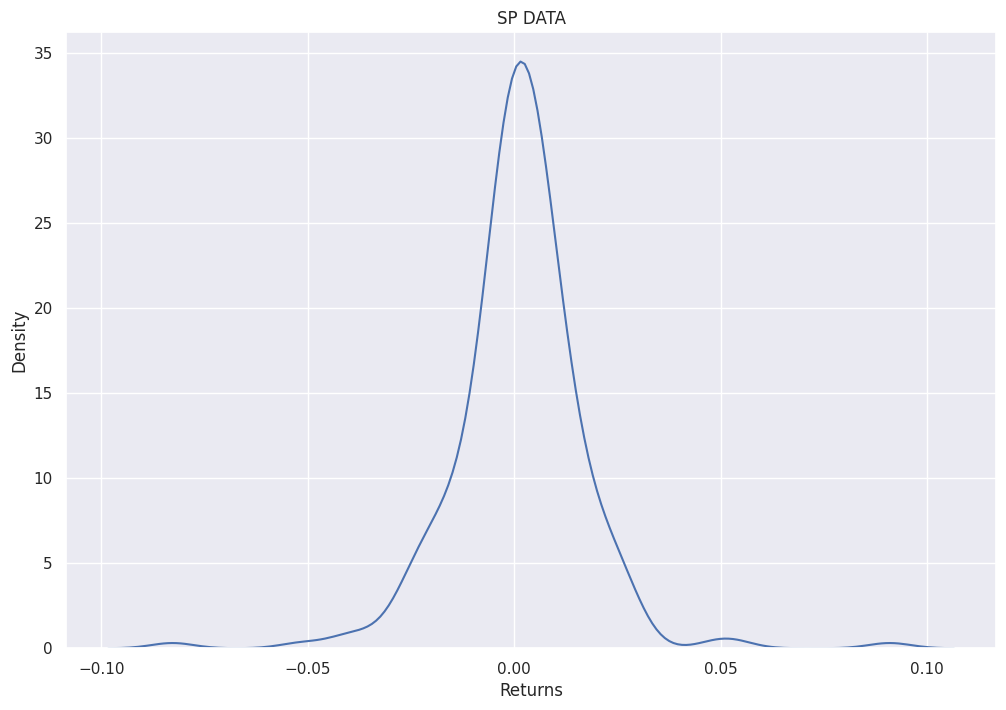

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=sp_data_withoutoct19,x='Returns')
plt.title('SP DATA')
plt.show()#it shows the left skew in data

##Linear regression

In [3]:
car_data=pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


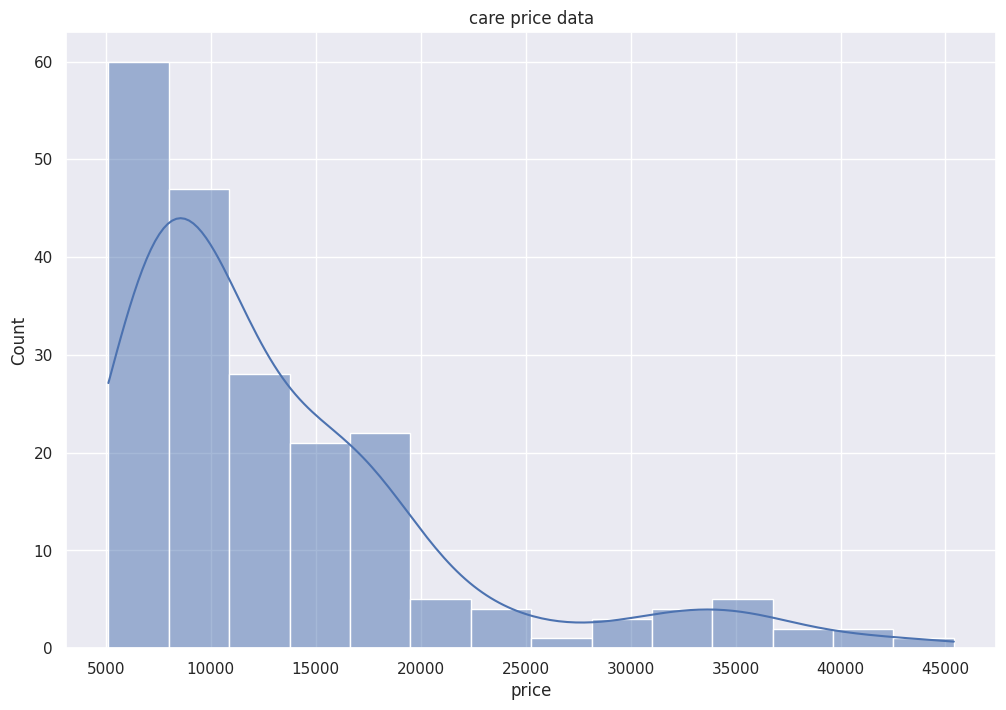

In [4]:
plt.figure(figsize=(12, 8))
sns.histplot(data=car_data,x='price',kde='true')
plt.title('care price data')
plt.show()

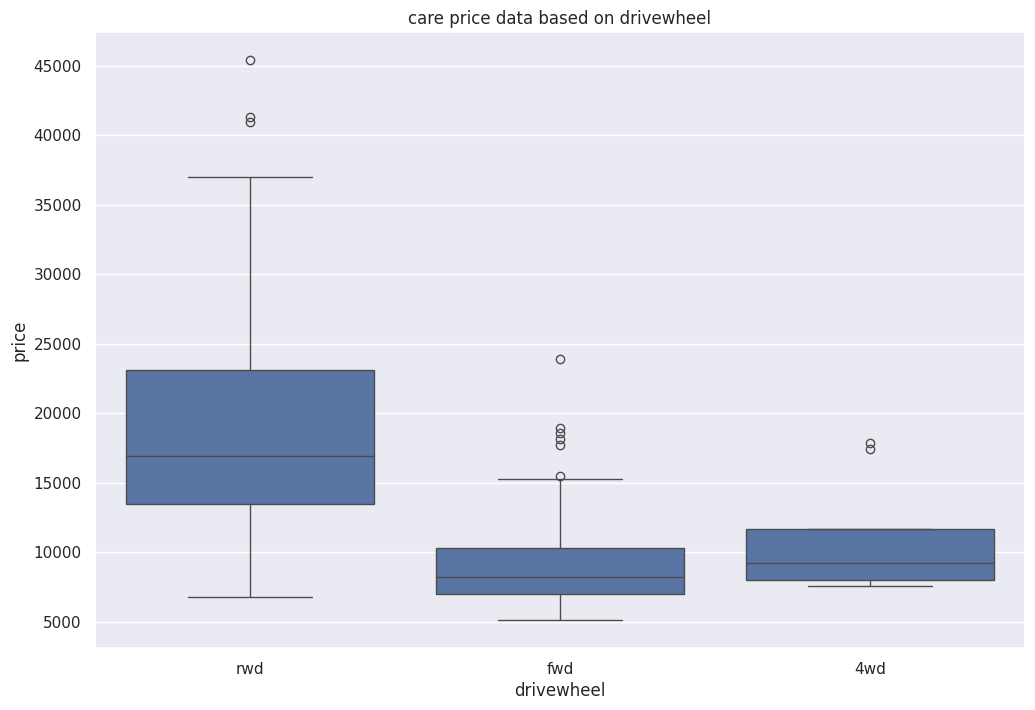

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=car_data,x='drivewheel',y='price')
plt.title('care price data based on drivewheel')
plt.show()

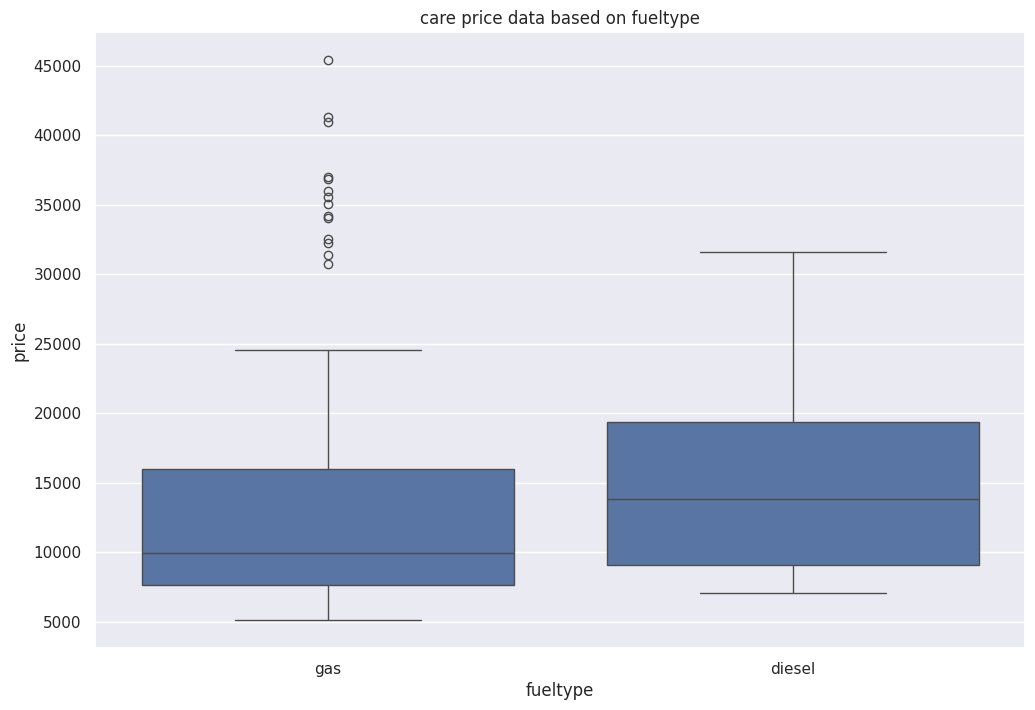

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=car_data,x='fueltype',y='price')
plt.title('care price data based on fueltype')
plt.show()

<Figure size 1200x800 with 0 Axes>

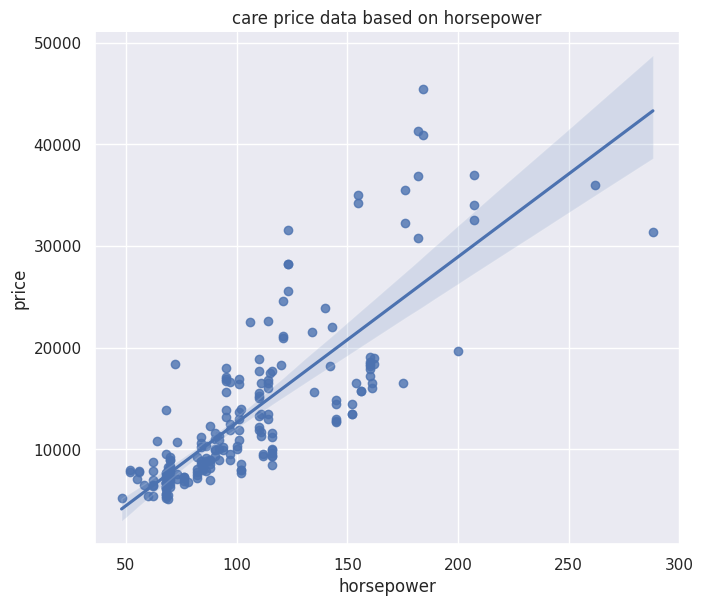

In [7]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=car_data,x='horsepower',y='price',height=6,aspect=1.2)# lmplot will give the line best fitted for the actualm datapoints
plt.title('care price data based on horsepower')
plt.show()

##**Regression analysis using single predictor**

In [21]:
#shuffle our car data
car_data=car_data.sample(frac=1).reset_index(drop=True)
car_data.shape

(205, 26)

In [22]:
x=car_data['horsepower']
y=car_data['price']

In [23]:
##add constant for y=mx+c
x=sm.add_constant(x)
x.head()

,const,horsepower
0,1.0,262
1,1.0,60
2,1.0,116
3,1.0,116
4,1.0,70


In [24]:
##devide train and test data
train_size=int(0.8 * len(x))
x_train=x[:train_size]
y_train=y[:train_size]

x_test=x[train_size:]
y_test=y[train_size:]

In [25]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [26]:
y_train.shape,y_test.shape

((164,), (41,))

In [27]:
##model fittle using OLS(ordinary least squares)
model=sm.OLS(y_train,x_train).fit()
model

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     369.6
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.19e-43
Time:                        19:22:24   Log-Likelihood:                -1609.1
No. Observations:                 164   AIC:                             3222.
Df Residuals:                     162   BIC:                             3228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3710.9350    953.099     -3.894      0.000   -5593.036   -1828.835
horsepower   162.0870      8.432     19.224      0.000     145.437     178.737
==============================================================================
Omnibus:                       41.670   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.516
Skew:                           1.108   Prob(JB):                     8.14e-21
Kurtosis:                       5.938   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

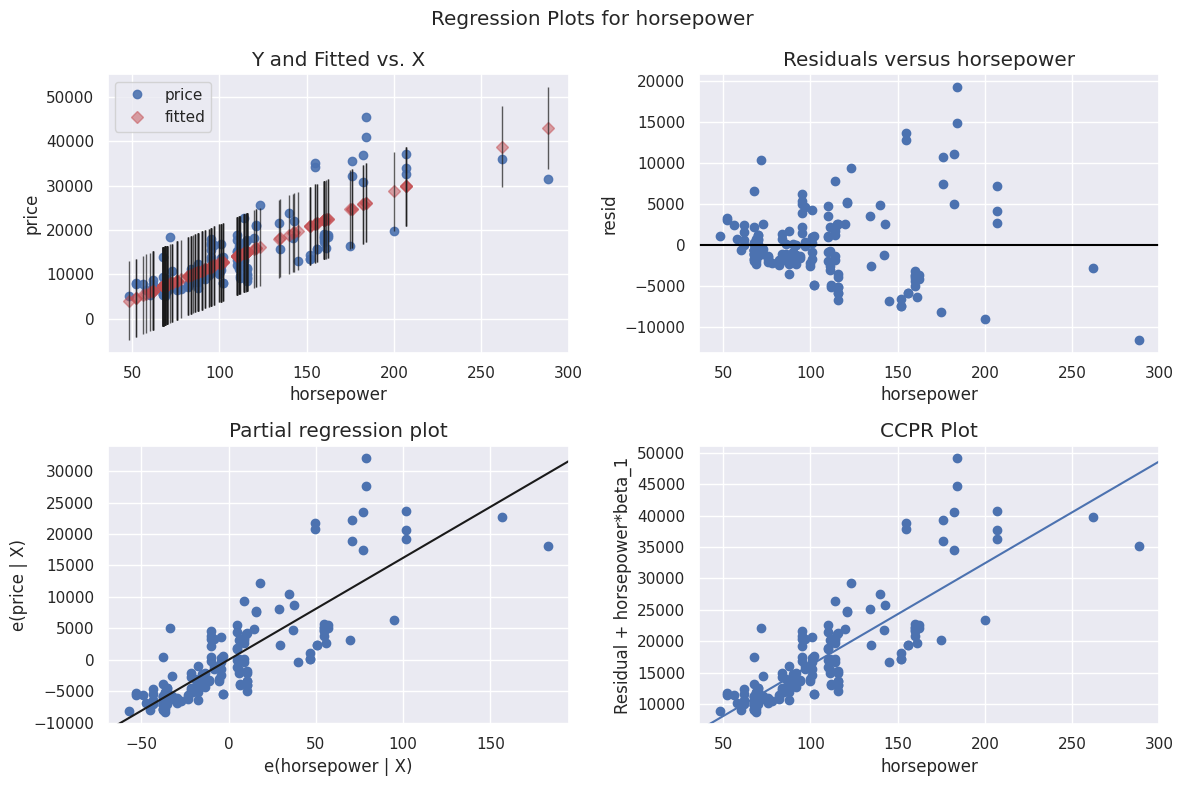

In [30]:
##view the regression plots for horsepower using "plot_regress_exog" against the single regressor
fig=plt.figure(figsize=(12, 8))
fig=sm.graphics.plot_regress_exog(model,'horsepower',fig=fig)

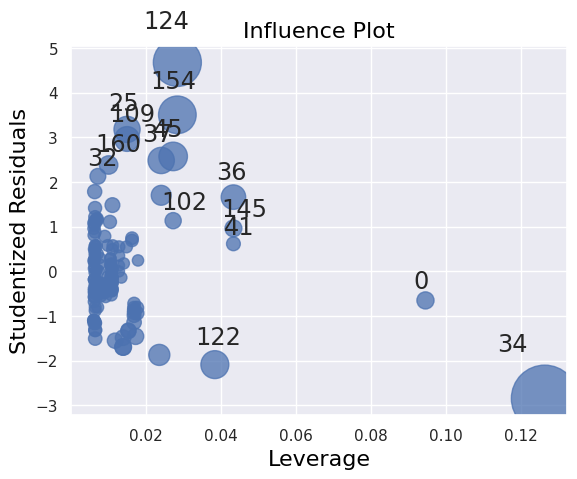

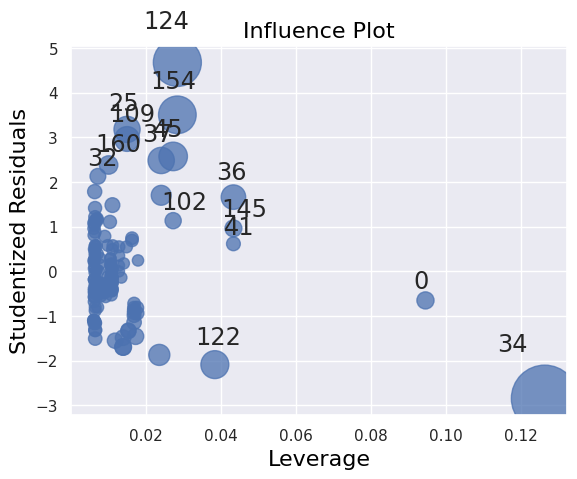

In [33]:
#use influence plot to better understand our regression model
sm.graphics.influence_plot(model)
#data that showing large circles are influential data points

In [35]:
##predict on test data by using our built model
y_pred=model.predict(x_test)
y_pred.head()

164     5365.936261
165    12011.502750
166     7310.980111
167    25788.896690
168     9580.197937
dtype: float64

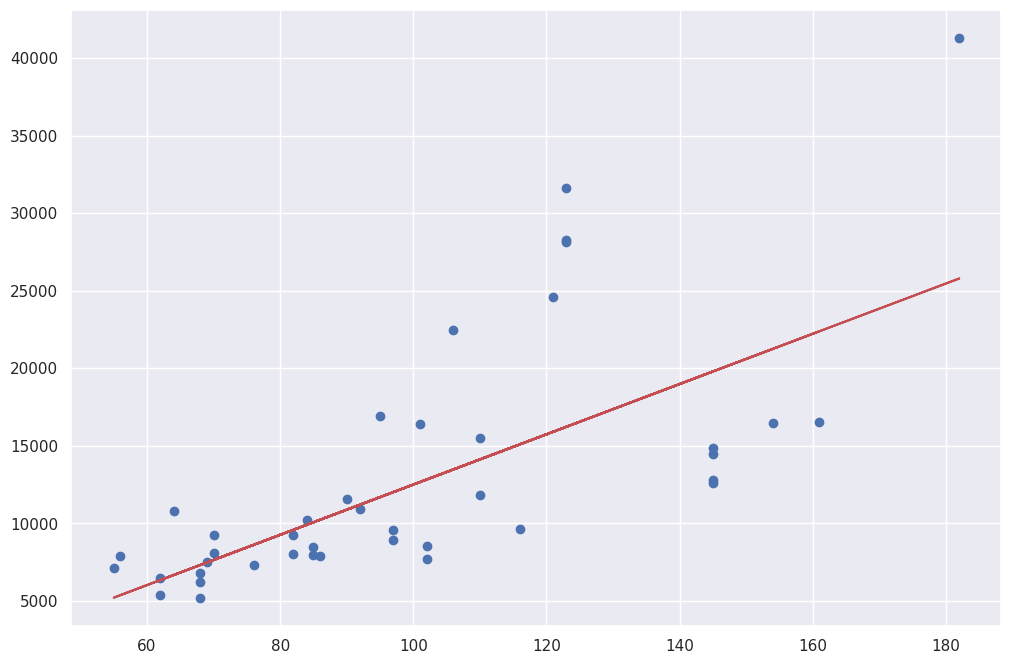

In [36]:
##see using plot
fig,ax=plt.subplots(figsize=(12, 8))
plt.scatter(x_test['horsepower'],y_test)
plt.plot(x_test['horsepower'],y_pred,color='r')

plt.xlabel='horsepower'
plt.ylabel='price'
plt.show()

In [37]:
##compute r square score for model evaluation
from sklearn .metrics import r2_score
r2_score(y_test,y_pred)

0.4761030664103274

###**Regression analysis using Multiple predictors**

In [8]:
car_data=pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


####explore and understand the corelation between varaiables

In [9]:
data_corr=car_data[['enginesize','boreratio','stroke','citympg','price']].corr()
data_corr

,enginesize,boreratio,stroke,citympg,price
enginesize,1.000000,0.583774,0.203129,-0.653658,0.874145
boreratio,0.583774,1.000000,-0.055909,-0.584532,0.553173
stroke,0.203129,-0.055909,1.000000,-0.042145,0.079443
citympg,-0.653658,-0.584532,-0.042145,1.000000,-0.685751
price,0.874145,0.553173,0.079443,-0.685751,1.000000


Text(0.5, 1.0, 'Correlations')

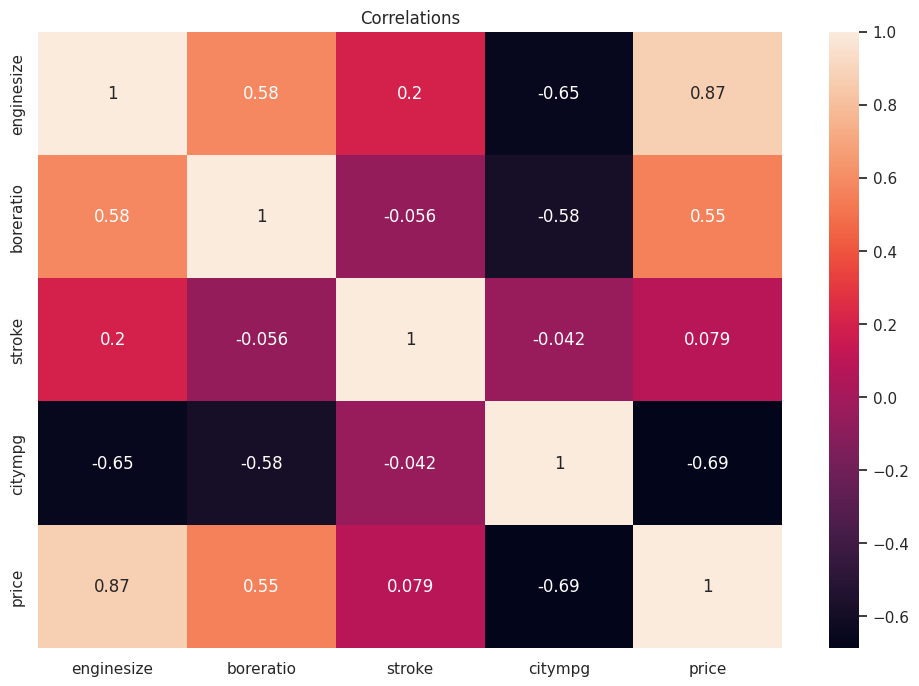

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr,annot=True)
plt.title('Correlations')
##Lower coefficients light colors

In [11]:
#convert categorical values to numeric form
cols=['aspiration','doornumber','enginelocation','fueltype']
car_data[cols].sample(3)

,aspiration,doornumber,enginelocation,fueltype
161,std,four,front,gas
32,std,two,front,gas
152,std,four,front,gas


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
  car_data[col]=le.fit_transform(car_data[col]) #converts categorical values to numeric using le(0 or 1)

In [13]:
car_data[cols].sample(3)

,aspiration,doornumber,enginelocation,fueltype
132,0,1,0,1
83,1,1,0,1
121,0,0,0,1


In [14]:
#drop the cols that dont have predictive power
car_data=car_data.drop(columns=['CarName','car_ID'])
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
##use one hot encoding to convert categorical columns that have more than one value
cat_columns=['carbody','enginetype','drivewheel','cylindernumber','fuelsystem']
for col in cat_columns:
  car_data=pd.concat([car_data.drop(col,axis=1),
                      pd.get_dummies(car_data[col],
                                     prefix=col,
                                     prefix_sep='_',
                                     drop_first=True)],axis=1)

In [52]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,False,False,False,False,False,False,False,True,False,False
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False


In [16]:
#shuffle our car data
car_data=car_data.sample(frac=1).reset_index(drop=True)
car_data.shape

(205, 44)

In [17]:
x=car_data.drop(['price'],axis=1)
y=car_data['price']

In [18]:
x=sm.add_constant(x)
x.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,2,1,0,1,0,93.7,156.9,63.4,53.7,...,False,False,False,True,False,False,False,False,False,False
1,1.0,0,0,1,0,0,107.9,186.7,68.4,56.7,...,False,False,False,False,False,True,False,False,False,False
2,1.0,-2,1,1,0,0,104.3,188.8,67.2,56.2,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,1,1,0,0,96.3,172.4,65.4,51.6,...,False,False,False,False,False,False,False,False,True,False
4,1.0,0,1,0,0,0,96.5,175.4,62.5,54.1,...,False,False,False,False,False,False,False,False,False,False


In [19]:
##devide train and test data
train_size=int(0.8 * len(x))
x_train1=x[:train_size]
y_train1=y[:train_size]

x_test1=x[train_size:]
y_test1=y[train_size:]

In [20]:
#create model
import numpy as np

y_train1 = y_train1.astype(np.float64)
x_train1 = x_train1.astype(np.float64)

model = sm.OLS(y_train1, x_train1).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     44.77
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.89e-56
Time:                        16:33:32   Log-Likelihood:                -1483.3
No. Observations:                 164   AIC:                             3049.
Df Residuals:                     123   BIC:                             3176.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.654e+04   1.29e+04     -1.287      0.201    -4.2e+04    8903.736
symboling               145.0835    298.342      0.486      0.628    -445.466     735.633
fueltype              -1.436e+04   6655.939     -2.157      0.033   -2.75e+04   -1182.164
aspiration             1315.3013   1143.619      1.150      0.252    -948.423    3579.026
doornumber              439.2992    769.616      0.571      0.569   -1084.108    1962.707
enginelocation         7877.9080   3084.145      2.554      0.012    1773.033     1.4e+04
wheelbase                46.3499    121.428      0.382      0.703    -194.010     286.710
carlength               -59.9935     58.592     -1.024      0.308    -175.973      55.986
carwidth                693.3772    301.164      2.302      0.023      97.242    1289.513
carheight                45.0013    165.348      0.272      0.786    -282.295     372.297
curbweight                5.6311      2.198      2.562      0.012       1.281       9.982
enginesize               80.0601     35.714      2.242      0.027       9.367     150.753
boreratio              -826.4043   1864.686     -0.443      0.658   -4517.436    2864.628
stroke                -3948.1870   1034.499     -3.817      0.000   -5995.913   -1900.460
compressionratio       -839.8317    620.036     -1.354      0.178   -2067.156     387.492
horsepower               12.7807     27.196      0.470      0.639     -41.052      66.613
peakrpm                   2.2009      0.740      2.976      0.004       0.737       3.665
citympg                -222.9745    174.575     -1.277      0.204    -568.535     122.586
highwaympg              277.3156    163.293      1.698      0.092     -45.913     600.544
carbody_hardtop       -3684.0401   1631.427     -2.258      0.026   -6913.349    -454.731
carbody_hatchback     -3519.9920   1398.703     -2.517      0.013   -6288.639    -751.345
carbody_sedan         -2056.7237   1531.648     -1.343      0.182   -5088.527     975.079
carbody_wagon         -3088.7948   1703.467     -1.813      0.072   -6460.703     283.114
enginetype_dohcv       -1.36e+04   6208.137     -2.191      0.030   -2.59e+04   -1310.721
enginetype_l          -1655.9765   1897.651     -0.873      0.385   -5412.260    2100.307
enginetype_ohc         3093.4473   1065.030      2.905      0.004     985.285    5201.610
enginetype_ohcf        1157.7022   1811.622      0.639      0.524   -2428.292    4743.696
enginetype_ohcv       -6115.7874   1488.972     -4.107      0.000   -9063.116   -3168.458
enginetype_rotor      -4214.6326   3223.038     -1.308      0.193   -1.06e+04    2165.173
drivewheel_fwd          405.3555   1376.259      0.295      0.769   -2318.865    3129.576
drivewheel_rwd         1408.1083   1556.879      0.904      0.368   -1673.638    4489.855
cylindernumber_five   -

In [22]:
y_pred=model.predict(x_test1)
y_pred[:5]


164      9698.77658
165    10342.662244
166     5925.178206
167    17086.171879
168     6749.208003
dtype: object

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred)

0.9312339325004252

In [24]:
#setup a dataframe with actual and predicted value
data_actual_pred=pd.DataFrame({'Actual value':y_test1.ravel(),
                               'Predicted value':y_pred.ravel()})
data_actual_pred[:5]

,Actual value,Predicted value
0,9095.0,9698.77658
1,7775.0,10342.662244
2,6795.0,5925.178206
3,18280.0,17086.171879
4,7299.0,6749.208003


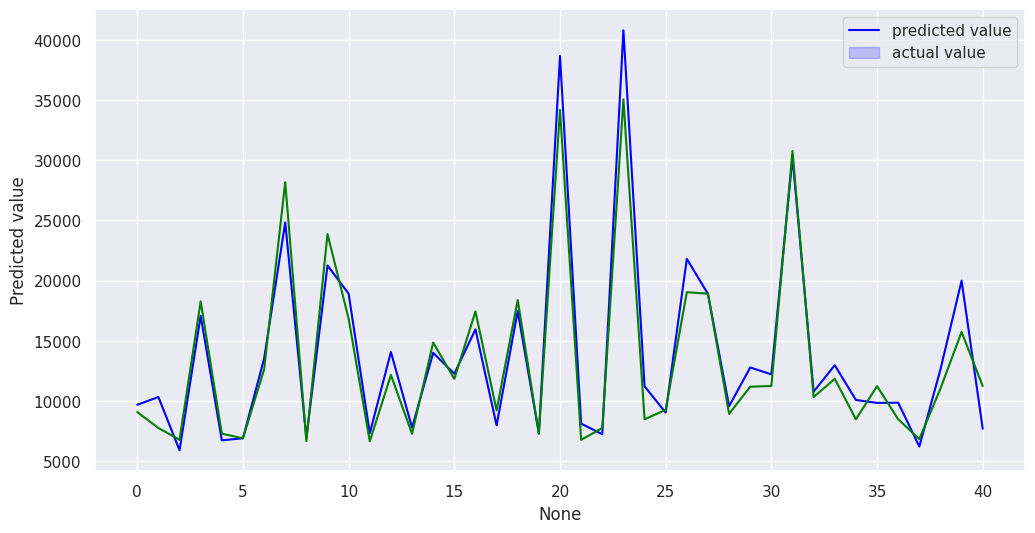

In [25]:
f,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=data_actual_pred.index,y='Predicted value',color='blue',data=data_actual_pred,ax=ax)
sns.lineplot(x=data_actual_pred.index,y='Actual value',color='green',data=data_actual_pred,ax=ax)
plt.legend(['predicted value','actual value'])